# Analisis
Notebook ini berisi kodingan untuk menjawab tujuan 1-4 dari penelitian yang dilakukan.

In [14]:
import numpy as np
import pandas as pd
from helpers.DataSaham import DataSaham
import json
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [2]:
def category_sentiment(compound, threshold_neg=-0.05, threshold_pos=0.05):
    if compound is None : return  None
    if compound < threshold_neg : return "Negative"
    if compound > threshold_pos : return "Positive"
    return "Netral"

all_articles = pd.read_json('data/data_vader.json')
saham = pd.read_json('data/table_saham.json')
article_saham = pd.read_json("data/table_article_saham.json")

all_articles['sentiment_category'] = all_articles.mean_compound.apply(category_sentiment)
# all_articles

## Tujuan 1

Melakukan analisis sentimen pada artikel berita yang berkaitan dengan BRI

### Jumlah Artikel Hasil Scraping

In [ ]:
norelated = pd.read_json('data/article_norelated_to_saham.json')
related = pd.read_json('data/article_related_to_saham.json')
alldata = pd.concat([related, norelated]).sort_values('published_at').reset_index(drop=True)
alldata['sumber'] = alldata.link.str.extract(r'https://(\w+)\.')
alldata = alldata[alldata.published_at <= "2022-04-01"]

In [30]:
print("Jumlah seluruh data: ", alldata.sumber.value_counts().sum())
alldata.sumber.value_counts()

finance      350966
market       116898
finansial     58817
Name: sumber, dtype: int64

In [34]:
for sumber, df in alldata.groupby('sumber'):
    print(sumber, df.sort_values('published_at').iloc[0, :].published_at)

finance 2004-04-01 05:09:00
finansial 2010-12-01 03:23:00
market 2010-12-01 00:48:00


### Jumlah Artikel yang Berkaitan dengan BRI

In [4]:
bri = DataSaham('BBRI', all_articles, saham, article_saham, end_date="2022-03-31", dropna=True)
bri.articles

e:\Belajar Programming\jupyter_notebook\skripsi\helpers\DataSaham.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles.loc[:, 'date'] = articles.loc[:,


,category,content,content_clean,id,link,mean_compound,mean_neg,mean_neu,mean_pos,per_sentence,published_at,related_to_saham,title,translate_text,website,sentiment_category,date
0,bursa dan valas,"Pada penutupan perdagangan hari ini, Kamis (1/...",pada penutupan perdagangan hari ini kamis inde...,1,https://finance.detik.com/bursa-dan-valas/d-12...,0.423440,0.000000,0.871700,0.128300,"[{'sentence_ke': 1, 'sentence': 'At the close ...",2004-04-01 16:22:00,"[{'code': 'BBCA', 'company_name': 'PT Bank Cen...","IHSG Hanya Naik 1,976 Poin","At the close of trading today, Thursday (1/4/2...",detik finance,Positive,2004-04-01
3,bursa dan valas,"Pada penutupan sesi pertama, Selasa (6/4/2004)...",pada penutupan sesi pertama selasa indeks harg...,4,https://finance.detik.com/bursa-dan-valas/d-12...,0.460500,0.008727,0.837545,0.153727,"[{'sentence_ke': 1, 'sentence': 'At the closin...",2004-04-06 12:18:40,"[{'code': 'AALI', 'company_name': 'PT Astra Ag...","IHSG Melejit 13,710 Poin",At the closing of the first session on Tuesday...,detik finance,Positive,2004-04-06
6,bursa dan valas,"Menjelang libur panjang, Indeks Harga Saham Ga...",menjelang libur panjang indeks harga saham gab...,7,https://finance.detik.com/bursa-dan-valas/d-12...,0.511350,0.022800,0.777500,0.199600,"[{'sentence_ke': 1, 'sentence': 'Towards a lon...",2004-04-08 16:21:19,"[{'code': 'AALI', 'company_name': 'PT Astra Ag...","Jelang Libur Panjang, Indeks Naik 5,218 Poin","Towards a long holiday, the Composite Stock Pr...",detik finance,Positive,2004-04-08
8,bursa dan valas,"Pada penutupan perdagangan sesi pertama, Senin...",pada penutupan perdagangan sesi pertama senin ...,9,https://finance.detik.com/bursa-dan-valas/d-12...,0.099385,0.032769,0.897077,0.070077,"[{'sentence_ke': 1, 'sentence': 'At the close ...",2004-04-12 12:24:00,"[{'code': 'ASII', 'company_name': 'PT Astra In...","Buntut Likuidasi Bank, IHSG Anjlok 13,253 Poin",At the close of trading the first session on M...,detik finance,Positive,2004-04-12
9,bursa dan valas,"Pada penutupan perdagangan Senin (14/4/2004), ...",pada penutupan perdagangan senin indeks harga ...,10,https://finance.detik.com/bursa-dan-valas/d-12...,0.078988,0.042375,0.883875,0.073750,"[{'sentence_ke': 1, 'sentence': 'At the close ...",2004-04-12 16:24:37,"[{'code': 'ADHI', 'company_name': 'PT Adhi Kar...","Indeks Melorot 11,805 Poin","At the close of trading on Monday (14/4/2004),...",detik finance,Positive,2004-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34936,Bursa & Saham,Indeks Harga Saham Gabungan (IHSG) dibuka meng...,indeks harga saham gabungan dibuka menguat pad...,34937,https://market.bisnis.com/read/20220413/7/1522...,0.252617,0.017000,0.887667,0.095333,"[{'sentence_ke': 1, 'sentence': 'The Composite...",2022-04-13 09:05:00,"[{'code': 'ADRO', 'company_name': 'PT Adaro En...","IHSG Dibuka Menguat, Asing Borong Saham TLKM, ...",The Composite Stock Price Index (CSPI) opened ...,bisnis.com,Positive,2022-04-13
34937,bursa dan valas,adalah indeks saham yang mengukur kinerja harg...,adalah indeks saham yang mengukur kinerja harg...,34938,https://finance.detik.com/bursa-dan-valas/d-60...,0.088960,0.000000,0.962875,0.037125,"[{'sentence_ke': 1, 'sentence': 'It is a stock...",2022-04-13 09:31:58,"[{'code': 'ADRO', 'company_name': 'PT Adaro En...","Mengenal Indeks Saham IDX30, Fungsi serta Daft...",It is a stock index that measures the price pe...,detik finance,Positive,2022-04-13
34939,Perbankan,Nilai tukar rupiah terhadap dolar Amerika Seri...,nilai tukar rupiah terhadap dolar amerika seri...,34940,https://finansial.bisnis.com/read/20220413/90/...,0.009944,0.000000,0.996469,0.003531,"[{'sentence_ke': 1, 'sentence': 'The rupiah ex...",2022-04-13 10:59:00,"[{'code': 'BBCA', 'company_name': 'PT Bank Cen...","Kurs Jual Beli Dolar AS di BCA dan BRI, Rabu 1...",The rupiah exchange rate against the US dollar...,bisnis.com,Netral,2022-04-13
34942,berita ekonomi bisnis,"Usaha ultra mikro, kecil dan menengah (UMKM) k..

In [4]:
bri.articles['sumber'] = bri.articles.link.str.extract(r'https://(\w+)\.')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11924\1593647820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bri.articles['sumber'] = bri.articles.link.str.extract(r'https://(\w+)\.')


In [5]:
bri.articles.sumber.value_counts()

market       4847
finansial    4303
finance      4256
Name: sumber, dtype: int64

In [6]:
bri.articles[bri.articles.date <= "2021-12-31"].sumber.value_counts()

market       4644
finance      4209
finansial    3976
Name: sumber, dtype: int64

In [7]:
bri.articles[bri.articles.date > "2021-12-31"].sumber.value_counts()

finansial    327
market       203
finance       47
Name: sumber, dtype: int64

### Preprocessing

In [5]:
articles = bri.articles.copy().reset_index(drop=True)
articles

,category,content,content_clean,id,link,mean_compound,mean_neg,mean_neu,mean_pos,per_sentence,published_at,related_to_saham,title,translate_text,website,sentiment_category,date
0,bursa dan valas,"Pada penutupan perdagangan hari ini, Kamis (1/...",pada penutupan perdagangan hari ini kamis inde...,1,https://finance.detik.com/bursa-dan-valas/d-12...,0.423440,0.000000,0.871700,0.128300,"[{'sentence_ke': 1, 'sentence': 'At the close ...",2004-04-01 16:22:00,"[{'code': 'BBCA', 'company_name': 'PT Bank Cen...","IHSG Hanya Naik 1,976 Poin","At the close of trading today, Thursday (1/4/2...",detik finance,Positive,2004-04-01
1,bursa dan valas,"Pada penutupan sesi pertama, Selasa (6/4/2004)...",pada penutupan sesi pertama selasa indeks harg...,4,https://finance.detik.com/bursa-dan-valas/d-12...,0.460500,0.008727,0.837545,0.153727,"[{'sentence_ke': 1, 'sentence': 'At the closin...",2004-04-06 12:18:40,"[{'code': 'AALI', 'company_name': 'PT Astra Ag...","IHSG Melejit 13,710 Poin",At the closing of the first session on Tuesday...,detik finance,Positive,2004-04-06
2,bursa dan valas,"Menjelang libur panjang, Indeks Harga Saham Ga...",menjelang libur panjang indeks harga saham gab...,7,https://finance.detik.com/bursa-dan-valas/d-12...,0.511350,0.022800,0.777500,0.199600,"[{'sentence_ke': 1, 'sentence': 'Towards a lon...",2004-04-08 16:21:19,"[{'code': 'AALI', 'company_name': 'PT Astra Ag...","Jelang Libur Panjang, Indeks Naik 5,218 Poin","Towards a long holiday, the Composite Stock Pr...",detik finance,Positive,2004-04-08
3,bursa dan valas,"Pada penutupan perdagangan sesi pertama, Senin...",pada penutupan perdagangan sesi pertama senin ...,9,https://finance.detik.com/bursa-dan-valas/d-12...,0.099385,0.032769,0.897077,0.070077,"[{'sentence_ke': 1, 'sentence': 'At the close ...",2004-04-12 12:24:00,"[{'code': 'ASII', 'company_name': 'PT Astra In...","Buntut Likuidasi Bank, IHSG Anjlok 13,253 Poin",At the close of trading the first session on M...,detik finance,Positive,2004-04-12
4,bursa dan valas,"Pada penutupan perdagangan Senin (14/4/2004), ...",pada penutupan perdagangan senin indeks harga ...,10,https://finance.detik.com/bursa-dan-valas/d-12...,0.078988,0.042375,0.883875,0.073750,"[{'sentence_ke': 1, 'sentence': 'At the close ...",2004-04-12 16:24:37,"[{'code': 'ADHI', 'company_name': 'PT Adhi Kar...","Indeks Melorot 11,805 Poin","At the close of trading on Monday (14/4/2004),...",detik finance,Positive,2004-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,Bursa & Saham,Indeks Harga Saham Gabungan (IHSG) dibuka meng...,indeks harga saham gabungan dibuka menguat pad...,34937,https://market.bisnis.com/read/20220413/7/1522...,0.252617,0.017000,0.887667,0.095333,"[{'sentence_ke': 1, 'sentence': 'The Composite...",2022-04-13 09:05:00,"[{'code': 'ADRO', 'company_name': 'PT Adaro En...","IHSG Dibuka Menguat, Asing Borong Saham TLKM, ...",The Composite Stock Price Index (CSPI) opened ...,bisnis.com,Positive,2022-04-13
13402,bursa dan valas,adalah indeks saham yang mengukur kinerja harg...,adalah indeks saham yang mengukur kinerja harg...,34938,https://finance.detik.com/bursa-dan-valas/d-60...,0.088960,0.000000,0.962875,0.037125,"[{'sentence_ke': 1, 'sentence': 'It is a stock...",2022-04-13 09:31:58,"[{'code': 'ADRO', 'company_name': 'PT Adaro En...","Mengenal Indeks Saham IDX30, Fungsi serta Daft...",It is a stock index that measures the price pe...,detik finance,Positive,2022-04-13
13403,Perbankan,Nilai tukar rupiah terhadap dolar Amerika Seri...,nilai tukar rupiah terhadap dolar amerika seri...,34940,https://finansial.bisnis.com/read/20220413/90/...,0.009944,0.000000,0.996469,0.003531,"[{'sentence_ke': 1, 'sentence': 'The rupiah ex...",2022-04-13 10:59:00,"[{'code': 'BBCA', 'company_name': 'PT Bank Cen...","Kurs Jual Beli Dolar AS di BCA dan BRI, Rabu 1...",The rupiah exchange rate against the US dollar...,bisnis.com,Netral,2022-04-13
13404,berita ekonomi bisnis,"Usaha ultra mikro, kecil dan menengah (UMKM) k..

In [6]:
# index = np.random.randint(0, articles.shape[0])
link = "https://finansial.bisnis.com/read/20160212/90/518356/per-februari-2016-bri-klaim-telah-salurkan-kredit-usaha-rp72-t"
index = articles[articles.link == link].index[0]

print(articles.iloc[index, :].content)
print(articles.iloc[index, :].link)

Hingga awal Februari 2016, PT Bank Rakyat Indonesia (Persero) Tbk. telah menyalurkan KUR sebesar Rp7,2 triliun. Direktur BRI Asmawi Syam mengatakan nilai KUR tersebut telah disalurkan ke 320.000 debitur. "Rata-ratanya Rp20 juta per orang. Dibandingkan dengan tahun lalu kira-kira rata-rata hanya Rp17,5 juta, berarti naik," katanya, Kamis (11/2/2016). Sejauh ini, lanjut Asmawi, penyaluran KUR terbesar di Yogyakarta, Semarang, dan Bandung. Dia menambahkan penyaluran KUR di Yogyakarta telah mencapai Rp851 miliar dengan 44.000 debitur, Semarang Rp622 miliar dengan 22.000 debitur, dan Bandung sebesar Rp595 miliar dengan 39.000 debitur. Adapun tahun ini, BRI mendapatkan alokasi target penyaluran KUR senilai Rp67,5 triliun yang terdiri dari KUR ritel senilai Rp6 triliun, KUR mikro senilai Rp61 triliun, dan KUR untuk tenaga kerja Indonesia senilai Rp500 miliar, dengan suku bunga sebesar 9%. Sementara tahun lalu, dari target KUR sebesar Rp21 triliun, BRI menyalurkan sekitar Rp15 triliun. Meski d

In [7]:
articles.iloc[index, :].translate_text

'As of early February 2016, PT Bank Rakyat Indonesia (Persero) Tbk has distributed KUR by 72 trillion. Director of BRI Asmawi Syam said the KUR value was channeled to the 320000 debtor. "The average is 20 million per person. Compared to last year approximately average of only 175 million, meaning up," he said on Thursday (11/2/2016). So far, continued Asmawi, the largest creep in Yogyakarta, Semarang and Bandung. He added that KUR distribution in Yogyakarta has reached 851 billion with 44000 debtors, Semarang 622 billion with 22000 debtors, and Bandung of 595 billion with 39000 debtors. As for this year, BRI obtained a 675 trillion KUR distribution target allocation consisting of 6 trillion retail, micro KUR worth 61 trillion, and KUR for Indonesian workers worth 500 billion, with an interest rate of 9%. While last year, from the 21 trillion KUR target, BRI distributed around 15 trillion. Although in terms of value it does not reach the target, the number of debtors KUR the Company has

In [23]:
import re
import unicodedata

def clean_text(text):
    text = unicodedata.normalize("NFKD", text)
    text = re.sub("\xad", "", text)
    
    # hapus titik dibeberapa kata tertentu
    text = re.sub(" Tbk\.", " Tbk ", text)
    text = re.sub(" Tbk", " Tbk ", text)
    text = re.sub(" Rp\.", " ", text)
    text = re.sub(" Rp", " ", text)
    text = re.sub(" PT\.", " PT ", text)
    text = re.sub(" Pt\.", " PT ", text)
    text = re.sub(" dr\.", " ", text)
    text = re.sub(" Dr\.", " ", text)
    text = re.sub(" DR\.", " ", text)
    text = re.sub(" N\.A\.", " ", text)
    text = re.sub(" H\.M\.", " HM", text)    
    text = re.sub(" jl\. ", " jalan ", text)
    text = re.sub(" Jl\. ", " jalan ", text)
    text = re.sub(" Jln\. ", " jalan ", text)
    text = re.sub(" jln\. ", " jalan ", text)    

    # stop words
    text = re.sub("Berikut rincian kurs jual-beli.*$", "", text)
    text = re.sub("(Simak berita lainnya seputar topik.+)$", "", text)
    text = re.sub("--.*--", " ", text) # hapus semua kalimat yang ada di tengah -- dan --
    
    # others pattern
    text = re.sub(r"\. *[0-9]+\. ", ". ", text) # hapus angka yang menunjukkan list seperti 1. 2. yang diawali dengan titik
    text = re.sub(r": *[0-9]+\. ", ". ", text) # hapus angka yang menunjukkan list seperti 1. 2. yang diawali dengan ":"
    text = re.sub("(?<=\d)(?=[a-zA-Z])", " ", text) # memisahkan angka yang berdempetan dengan huruf
    text = re.sub("(?<=[a-zA-Z])(?=\d)", " ", text) # memisahkan huruf yang berdempetan dengan angka
    text = re.sub(" ([a-zA-Z]{1,2})\. ", " ", text) # hapus dua huruf yang diikuti titik karena biasa hanya singkatan nama
    
    # hapus url
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "link-website", text)
    
    text = re.sub("\*", "", text) # hapus bintang
    text = re.sub(r"(?<=\d)[,.](?=\d)", "", text) # hapus titik atau koma ditengah angka
    text = re.sub(":", ": ", text) # menambahkan spasi setelah :
    text = re.sub(r"\.(?=\S)", ". ", text) # ada spasi setelah titik
    text = re.sub(r"\?(?=\S)", "? ", text) # ada spasi setelah tanda tanya
    text = re.sub(r"\)(?=\S)", ") ", text) # ada spasi setelah tutup kurung
    text = re.sub(r"\((?=\S)", " (", text) # ada spasi sebelum tutup kurung

    text = re.sub("\. +\.", ".", text) # hapus spasi diantara dua titik
    text = re.sub(" +\? +", "? ", text) # hapus spasi sebelum tanda tanya
    text = re.sub(" +,", ", ", text) # hapus spasi sebelum koma
    text = re.sub(" +\. ", ". ", text) # hapus spasi sebelum titik
    text = re.sub("\.,", ", ", text) # hapus .,
    
    text = re.sub(" {2,}", " ", text) # hapus spasi yang berulang
    text = re.sub("\.{2,}", ".", text) # hapus titik yang berulang
    text = re.sub("\?{2,}", ".", text) # hapus tanda tanya yang berulang
    
    text = re.sub(r'\. *\([^)]*\)[\. ]', ". ", text) # hapus kurung di awal kalimat
    text = re.sub(r'\. *\([^)]*\)$', ".", text) # hapus kurung di akhir artikel
    
    text = re.sub(" Bisnis\.com", " bisniscom", text)
    text = re.sub(" Bisnis\. com", " bisniscom", text)
    text = re.sub(" bisnis\. com", " bisniscom", text)
    text = re.sub(" bisnis\.com", " bisniscom", text)
    
    return text.strip()

In [16]:
clean_text(articles.iloc[index, :].content)

'Hingga awal Februari 2016, PT Bank Rakyat Indonesia (Persero) Tbk telah menyalurkan KUR sebesar 72 triliun. Direktur BRI Asmawi Syam mengatakan nilai KUR tersebut telah disalurkan ke 320000 debitur. "Rata-ratanya 20 juta per orang. Dibandingkan dengan tahun lalu kira-kira rata-rata hanya 175 juta, berarti naik," katanya, Kamis (11/2/2016). Sejauh ini, lanjut Asmawi, penyaluran KUR terbesar di Yogyakarta, Semarang, dan Bandung. Dia menambahkan penyaluran KUR di Yogyakarta telah mencapai 851 miliar dengan 44000 debitur, Semarang 622 miliar dengan 22000 debitur, dan Bandung sebesar 595 miliar dengan 39000 debitur. Adapun tahun ini, BRI mendapatkan alokasi target penyaluran KUR senilai 675 triliun yang terdiri dari KUR ritel senilai 6 triliun, KUR mikro senilai 61 triliun, dan KUR untuk tenaga kerja Indonesia senilai 500 miliar, dengan suku bunga sebesar 9%. Sementara tahun lalu, dari target KUR sebesar 21 triliun, BRI menyalurkan sekitar 15 triliun. Meski dari segi nilai tidak mencapai t

### Sentimen Skor

In [8]:
data = bri.articles.copy()
selected_columns = ['title', 'content', 'date', 'website', 'mean_compound', 'sentiment_category']
data = data[selected_columns].reset_index(drop=True)

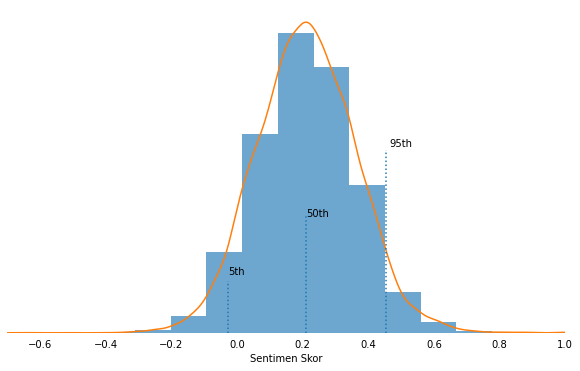

In [38]:
skor = data.mean_compound
skor = data.mean_compound

fig, ax = plt.subplots(figsize = (10,6))

skor.plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
skor.plot(kind = "kde")

quant_5 = skor.quantile(0.05)
quant_50, quant_95 = skor.quantile(0.5), skor.quantile(0.95)

quants = [[quant_5, 1, 0.16], [quant_50, 1, 0.36],  [quant_95, 1, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


ax.set_xlabel("Sentimen Skor")
x_start, x_end = -0.7, 1
ax.set_xlim(x_start, x_end)

ax.set_yticklabels([])
ax.set_ylabel("")

ax.text(quant_5, 0.5, "5th", size = 10, alpha = 1)
ax.text(quant_50, 1, "50th", size = 10, alpha = 1)
ax.text(quant_95 + 0.01, 1.6, "95th", size = 10, alpha =1)

ax.grid(False)
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

In [14]:
skor.describe()

count    13406.000000
mean         0.211478
std          0.150644
min         -0.636900
25%          0.110347
50%          0.210263
75%          0.312140
max          0.994800
Name: mean_compound, dtype: float64

In [21]:
articles.iloc[skor.argmin(), :].title

'Ini Nilai Kurs Dolar di Tujuh Bank, BCA Paling Tinggi'

In [27]:
articles.iloc[skor.argmin(), :]

category                                                      Perbankan
content               Kurs jual-beli dolar Amerika Serikat siang ini...
content_clean         kurs jualbeli dolar amerika serikat siang ini ...
id                                                                11846
link                  https://finansial.bisnis.com/read/20150313/90/...
mean_compound                                                   -0.6369
mean_neg                                                          0.046
mean_neu                                                          0.954
mean_pos                                                            0.0
per_sentence          [{'sentence_ke': 1, 'sentence': 'The US dollar...
published_at                                        2015-03-13 13:35:00
related_to_saham      [{'code': 'BBCA', 'company_name': 'PT Bank Cen...
title                 Ini Nilai Kurs Dolar di Tujuh Bank, BCA Paling...
translate_text        The US dollar buying and selling exchange 

In [28]:
articles.iloc[skor.argmin(), :].content

'Kurs jual-beli dolar Amerika Serikat siang ini, Jumat (13/3/2015), berada pada kisaran Rp13.015 per dolar AS hingga Rp13.335 per dolar AS. Berdasarkan pantauan Bisnis.com kurs jual dolar AS di tujuh perbankan bergerak pada Rp13.085 per dolar AS hingga Rp13.335 per dolar AS, dengan kurs jual terendah terdapat di PT Bank Rakyat Indonesia Tbk., dan tertinggi di PT Bank Central Asia Tbk. Sementara itu, kurs beli dolar AS di tujuh perbankan bergerak pada Rp13.032 per dolar AS hingga Rp13.169 per dolar AS, dengan kurs beli tertinggi berada di PT Bank Danamon Tbk., dan terendah di PT Bank Tabungan Negara Tbk. Berikut rincian kurs jual-beli dolar AS-rupiah di sejumlah perbankan, hari ini: Bank Kurs Jual Kurs Beli WIB Sumber: website masing-masing perbankan.'

In [29]:
articles.iloc[skor.argmax(), :].title

'SAHAM HARI INI (02/03): Smartfren paling aktif'

In [30]:
articles.iloc[skor.argmax(), :].content

'Saham PT Smartfren Telecom Tbk menjadi saham yang paling aktif ditransaksikan hari ini, 2 Maret 2012, bersama dengan PT Bank Rakyat Indonesia Tbk.Berikut saham teraktif selengkapnya:* PT Smartfren Telecom Tbk sebanyak 13.748 kali senilai Rp22,36 miliar ke Rp91* PT Bank Rakyat Indonesia Tbk sebanyak 5.525 kali senilai Rp472,75 miliar ke Rp6.650* PT Agis Tbk sebanyak 3.540 kali senilai Rp7,02 miliar stagnan di Rp164* PT Bank Mandiri Tbk sebanyak 2.437 kali senilai Rp214,28 miliar ke Rp6.500* PT Adaro Energy Tbk sebanyak 2.325 kali senilai Rp104,24 miliar ke Rp1.970Saham yang paling menguat:* PT Bank Of India Indonesia Tbk sebesar 25% atau Rp230 ke Rp1.150 senilai Rp575.000* PT Alam Karya Unggul Tbk sebesar 22,22% atau Rp40 ke Rp220 senilai Rp3,4 juta* PT Rig Tenders Indonesia Tbk sebesar 13,73% atau Rp70 ke Rp580 senilai Rp2,39 miliar* PT Metropolitan Land Tbk sebesar 10,91% atau Rp30 ke Rp305 senilai Rp19,45 miliar* PT Voksel Electric Tbk sebesar 9,47% atau Rp90 ke Rp1.040 senilai Rp39

In [37]:
lebih_kecil_dari_nol = skor[skor <= 0].shape[0]
print("Jumlah sentimen skore lebih kecil dari 0:", lebih_kecil_dari_nol)
print("Atau sebanyak", lebih_kecil_dari_nol / skor.shape[0] * 100)

Jumlah sentimen skore lebih kecil dari 0: 1056
Atau sebanyak 7.877069968670744


In [59]:
title_str = data.title.str.lower().str
data_selected = data[title_str.contains('bri') | title_str.contains('bbri') | title_str.contains('bank rakyat indonesia')]
data_selected.head()

,title,content,date,website,mean_compound,sentiment_category
27,"Kuartal I 2004, Laba Bersih BRI Naik 46,6 Persen",Bank Rakyat Indonesia (BRI) berhasil mencetak ...,2004-05-27,detik finance,0.315069,Positive
28,"BRI Bagikan Dividen Rp 84,19 per Saham",PT Bank Rakyat Indonesia (BRI) Tbk membagikan ...,2004-05-31,detik finance,0.324829,Positive
36,BRI Telah Peroleh Izin UP3 untuk Bagikan Dividen,PT Bank Rakyat Indonesia Tbk (BBRI) akan memba...,2004-06-17,detik finance,0.244337,Positive
52,BRI Berminat Ikuti Divestasi Permata,Bank Rakyat Indonesia (BRI) menyatakan minatny...,2004-07-20,detik finance,0.019193,Netral
56,"Semester I, Laba Bersih BRI Diprediksi Lebih R...",Laba bersih PT Bank Rakyat Indonesia Tbk (BBRI...,2004-07-29,detik finance,0.224029,Positive


In [70]:
for index, row in data_selected.nlargest(5, columns='mean_compound').iterrows():
    print(row['title'], round(row['mean_compound'], 3))

BRI Raih Best Performance Overall 0.882
BRI Raih Penghargaan Bank Terbaik 0.878
BRI Raih Best Listed Companies 2012 0.866
Nasabah BRI Terima Grand Prize 0.822
Manfaatkan Rights Issue, Pria Ini Pilih Saham BBRI Jadi Kado Tunangan 0.773


In [71]:
for index, row in data_selected.nsmallest(5, columns='mean_compound').iterrows():
    print(row['title'], round(row['mean_compound'], 3))

Serikat Pekerja Pegadaian Tolak Rencana Akuisisi BRI -0.526
BRI Salurkan Bantuan CSR Peduli Korban Bencana Gempa Halmahera -0.402
Cerita soal Krisis, Bos BRI: Tidak Ada yang Seberat Hari Ini -0.34
Jaringan di Jawa Timur Terdampak Gempa, BRI Pastikan Layanan Tetap Berjalan -0.309
BRI Bagikan Ribuan Makanan Siap Saji dan Berikan Bantuan Tanggap Darurat untuk Korban Gempa di Sulawesi Barat -0.307


## Tujuan 2
Melakukan hyperparameter optimization dan walk forward validation untuk mendapatkan hyperparameter terbaik pada setiap kombinasi variabel yang akan diteliti.

In [3]:
class SummaryHPO():
    def __init__(self, file_path=None, root=None, with_details=False):
        """If `file_path` is not None, will be read from file even `root` is not None
        """
        if file_path is None and root is None:
            raise Exception('File Path and root can\'t be None at the same time')
        
        self.data = pd.read_csv(file_path) if file_path is not None else self._read_from_folder(root)
        
        if not with_details and 'details' in self.data.columns:
            self.data.drop('details', axis=1, inplace=True)
          
    def _read_from_folder(self, root):
        
        trials = []
        for dir1 in os.listdir(root):
            for dir2 in os.listdir(os.path.join(root, dir1)):
                for dir3 in os.listdir(os.path.join(root, dir1, dir2)):
                    dir4 = os.path.join(root, dir1, dir2, dir3)
                    
                    if not os.path.isdir(dir4) or dir3 == 'trial_data':                
                        continue
                
                    with open(os.path.join(dir4, 'metrics.json'), 'r') as f:
                        metrics = json.load(f)
                        
                    with open(os.path.join(dir4, 'trial.json'), 'r') as f:
                        trial_json = json.load(f)
                        
                    with open(os.path.join(dir4, 'summary_iter.json'), 'r') as f:
                        summary = json.load(f)
                        summary = pd.DataFrame(summary)
                           
                    trials.append({
                        'variabel' : dir1,
                        'iterasi' : dir2,
                        'trial' : dir3,
                        'rmse_total' : metrics['rmse_total'], 
                        'mae_total' : metrics['mae_total'], 
                        'mean_best_epoch' : summary.best_epoch.mean(),
                        'mean_stopped_epoch' : summary.stopped_epoch.mean(),
                        'mean_training_time' : summary.training_time.mean(),
                        'rmse_eachday' : metrics['rmse_eachday'], 
                        'mae_eachday' : metrics['mae_eachday'],
                        'hyperparameters' : trial_json['hyperparameters']['values'],
                        'details' : summary.to_json(orient='records')
                    })               
        trials = pd.DataFrame(trials)     
        trials['kombinasi_variabel'] = trials.variabel.apply(self._define_kombinasi_variabel)
        return trials
    
    def _define_kombinasi_variabel(self, variabel):
        if variabel == 'close': return 'KV 1'
        if variabel == 'close_sentiment': return 'KV 2'
        if variabel == 'close_kurs': return 'KV 3'
        if variabel == 'close_technical': return 'KV 4'
        if variabel == 'close_sentiment_kurs': return 'KV 5'
        if variabel == 'close_technical_sentiment': return 'KV 6'
        if variabel == 'close_technical_kurs': return 'KV 7'
        if variabel == 'close_technical_sentiment_kurs': return 'KV 8'
        
    def __groupby(self, columns, target='rmse_total'):
        idx_best =  self.data.groupby(columns)[target].idxmin()
        return self.data.loc[idx_best].reset_index(drop=True).sort_values(columns)
    
    @property
    def best_per_kv(self):
        return self.__groupby(['kombinasi_variabel'])
    
    @property
    def best_per_kv_iterasi(self):
        return self.__groupby(['kombinasi_variabel', 'iterasi'])
    
    @property
    def mean_rmse(self):
        per_kv = self.best_per_kv_iterasi
        return per_kv.groupby('kombinasi_variabel')['rmse_total'].agg([np.mean, np.std, np.min, np.max])
    
    @property
    def mean_mae(self):
        per_kv = self.best_per_kv_iterasi
        return per_kv.groupby('kombinasi_variabel')['mae_total'].agg([np.mean, np.std, np.min, np.max])
    
    @property
    def best_params(self):
        params  = []
        
        for index, row in self.best_per_kv.iterrows():
            param = eval(row['hyperparameters'])
            temp = {
                'kombinasi_variabel' : row['kombinasi_variabel'],
                'look_back' : param['look_back'],
                'optimizer' : param['optimizer'],
                'learning_rate' : param['lr'],
                'num_layers' : param['num_layers']
            }
            
            for i in range(1, 4):
                temp[f'layer_{i}_unit'] = param[f"units_{i-1}"] if i <= param['num_layers'] else None
                temp[f'layer_{i}_dropout'] = param[f"units_{i-1}"] if i <= param['num_layers'] else None

            params.append(temp)

        return pd.DataFrame(params)

In [4]:
summary = SummaryHPO('data/summary_hpo.csv', with_details=True)
summary.data.head()

,variabel,iterasi,trial,rmse_total,mae_total,mean_best_epoch,mean_stopped_epoch,mean_training_time,rmse_eachday,mae_eachday,hyperparameters,details,kombinasi_variabel
0,close,iterasi_1,trial_0651af61845db4f60a323dc47f4c5b96,47.118951,39.203311,24.1,68.4,80.371712,"[49.75949828858457, 44.55376861316354, 42.7920...","[36.6145751953125, 35.3653564453125, 35.505322...","{'look_back': 10, 'batch_size': 48, 'num_layer...","[{""iteration"":1,""rmse"":52.6773124932,""mae"":46....",KV 1
1,close,iterasi_1,trial_08e20aee8b576ba114bb83903e139a80,54.002392,46.467202,15.3,68.8,157.355824,"[47.17901739777516, 40.6362804536982, 56.39297...","[35.579052734375, 33.530810546875, 45.63842773...","{'look_back': 5, 'batch_size': 0, 'num_layers'...","[{""iteration"":1,""rmse"":56.3170567344,""mae"":49....",KV 1
2,close,iterasi_1,trial_0df922d385e446fb265a290059318115,73.844882,66.006187,54.4,71.3,89.424037,"[96.16007571269905, 94.05492523617059, 74.1213...","[84.3698974609375, 81.69462890625, 56.98515625...","{'look_back': 30, 'batch_size': 0, 'num_layers...","[{""iteration"":1,""rmse"":124.8152655269,""mae"":12...",KV 1
3,close,iterasi_1,trial_114842ae2290c4098ddd27aa4ad903d5,51.724651,46.434399,34.4,61.6,470.136623,"[37.486213392055184, 52.299315771218595, 54.63...","[29.007763671875, 42.77666015625, 46.440795898...","{'look_back': 10, 'batch_size': 64, 'num_layer...","[{""iteration"":1,""rmse"":29.9204072956,""mae"":27....",KV 1
4,close,iterasi_1,trial_1f7362d7192639481a3c480ec3acafde,124.500761,115.165791,43.0,56.8,546.415312,"[175.1670585416593, 187.80948240791565, 140.20...","[115.259912109375, 132.2505859375, 116.8265625...","{'look_back': 30, 'batch_size': 16, 'num_layer...","[{""iteration"":1,""rmse"":50.56148333,""mae"":42.64...",KV 1


### Hyperparameter Terbaik

#### Terbaik Setiap Kombinasi Variabel

In [5]:
summary.best_per_kv

,variabel,iterasi,trial,rmse_total,mae_total,mean_best_epoch,mean_stopped_epoch,mean_training_time,rmse_eachday,mae_eachday,hyperparameters,details,kombinasi_variabel
0,close,iterasi_8,trial_33,37.700416,29.915005,38.3,62.4,51.115790,"[42.30830028031701, 47.4052190925669, 38.57013...","[36.4391845703125, 32.3941162109375, 32.869750...","{'look_back': 30, 'batch_size': 0, 'num_layers...","[{""iteration"":1,""rmse"":38.8530336765,""mae"":29....",KV 1
1,close_sentiment,iterasi_7,trial_32,34.725599,29.426167,28.9,64.1,95.063141,"[38.94208976397528, 25.316659398542992, 31.107...","[31.905224609375, 22.1343505859375, 24.9444580...","{'look_back': 30, 'batch_size': 16, 'num_layer...","[{""iteration"":1,""rmse"":34.0096100143,""mae"":25....",KV 2
2,close_kurs,iterasi_2,trial_10,37.015008,30.192544,29.6,61.6,59.762944,"[48.66944506070375, 22.07098235634584, 32.6471...","[32.476416015625, 17.12109375, 27.800122070312...","{'look_back': 20, 'batch_size': 32, 'num_layer...","[{""iteration"":1,""rmse"":36.3394122073,""mae"":32....",KV 3
3,close_technical,iterasi_4,trial_16,33.356068,27.148979,15.7,47.2,121.656643,"[31.52660995818625, 43.35446790307627, 31.8688...","[26.4115234375, 34.12353515625, 23.07172851562...","{'look_back': 5, 'batch_size': 0, 'num_layers'...","[{""iteration"":1,""rmse"":39.2281634477,""mae"":29....",KV 4
4,close_sentiment_kurs,iterasi_9,trial_49,36.817878,31.044727,27.1,59.6,34.730067,"[47.97543558419453, 25.0681532295171, 37.27240...","[39.1072265625, 21.0338623046875, 32.207177734...","{'look_back': 10, 'batch_size': 48, 'num_layer...","[{""iteration"":1,""rmse"":33.9228016808,""mae"":26....",KV 5
5,close_technical_sentiment,iterasi_5,trial_00,38.609306,31.643052,9.8,44.2,74.033251,"[42.24585578396423, 39.269011601465095, 41.593...","[28.8334228515625, 32.7029541015625, 32.766308...","{'look_back': 30, 'batch_size': 32, 'num_layer...","[{""iteration"":1,""rmse"":40.3499502386,""mae"":31....",KV 6
6,close_technical_kurs,iterasi_3,trial_6325d54f2bafd0df96f7f97c0ca0711e,39.992219,35.958633,31.7,65.6,991.044247,"[29.379763230214675, 36.20667970885692, 45.199...","[27.985009765625, 32.1075927734375, 35.3429931...","{'look_back': 30, 'batch_size': 64, 'num_layer...","[{""iteration"":1,""rmse"":33.2613517701,""mae"":30....",KV 7
7,close_technical_sentiment_kurs,iterasi_6,trial_35,37.408493,31.420132,31.7,48.1,73.822820,"[43.15403187615374, 21.730971111776903, 41.495...","[31.9246337890625, 17.8385498046875, 36.393408...","{'look_back': 5, 'batch_size': 32, 'num_layers...","[{""iteration"":1,""rmse"":34.9080032264,""mae"":25....",KV 8


#### Visualize Best Model

In [6]:
summary.best_per_kv[summary.best_per_kv.kombinasi_variabel == 'KV 2']

,variabel,iterasi,trial,rmse_total,mae_total,mean_best_epoch,mean_stopped_epoch,mean_training_time,rmse_eachday,mae_eachday,hyperparameters,details,kombinasi_variabel
1,close_sentiment,iterasi_7,trial_32,34.725599,29.426167,28.9,64.1,95.063141,"[38.94208976397528, 25.316659398542992, 31.107...","[31.905224609375, 22.1343505859375, 24.9444580...","{'look_back': 30, 'batch_size': 16, 'num_layer...","[{""iteration"":1,""rmse"":34.0096100143,""mae"":25....",KV 2


In [7]:
model = tf.keras.models.load_model('model/close_sentiment/iterasi_7/trial_32/model.h5')
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer_0 (LSTM)         (None, 250)               253000    
                                                                 
 dropuout_layer_0 (Dropout)  (None, 250)               0         
                                                                 
 dense_layer_output (Dense)  (None, 5)                 1255      
                                                                 
Total params: 254,255
Trainable params: 254,255
Non-trainable params: 0
_________________________________________________________________


### Stabilitas Bayesian Optimization

In [16]:
summary.best_per_kv_iterasi

,variabel,iterasi,trial,rmse_total,mae_total,mean_best_epoch,mean_stopped_epoch,mean_training_time,rmse_eachday,mae_eachday,hyperparameters,details,kombinasi_variabel
0,close,iterasi_1,trial_3711362870beb0a60094bdae2a9d705c,41.638714,36.148911,76.1,80.8,54.351222,"[51.07014454899634, 33.35666770821832, 52.4738...","[36.6301025390625, 26.2391357421875, 49.236132...","{'look_back': 5, 'batch_size': 0, 'num_layers'...","[{""iteration"":1,""rmse"":49.1404679167,""mae"":40....",KV 1
1,close,iterasi_10,trial_11,41.603930,36.855537,18.0,64.2,45.763962,"[47.962863808060625, 38.915599040521556, 42.04...","[33.9612060546875, 33.1368408203125, 37.655590...","{'look_back': 10, 'batch_size': 32, 'num_layer...","[{""iteration"":1,""rmse"":33.5268968997,""mae"":30....",KV 1
2,close,iterasi_2,trial_04,40.412176,34.122354,38.9,58.9,43.422629,"[39.50667437686212, 33.38522192805482, 38.1888...","[32.3406005859375, 24.9086669921875, 32.482446...","{'look_back': 10, 'batch_size': 48, 'num_layer...","[{""iteration"":1,""rmse"":27.6651617892,""mae"":22....",KV 1
3,close,iterasi_3,trial_35,41.557428,35.844131,36.2,62.7,34.306706,"[34.23361830343, 33.975938472073956, 37.789606...","[28.5850830078125, 27.4904296875, 32.998608398...","{'look_back': 5, 'batch_size': 0, 'num_layers'...","[{""iteration"":1,""rmse"":37.9484602642,""mae"":32....",KV 1
4,close,iterasi_4,trial_38,39.930751,33.572139,28.2,47.8,71.050892,"[39.38902504541742, 33.92979160585359, 42.0150...","[32.0493896484375, 26.739892578125, 33.1051757...","{'look_back': 5, 'batch_size': 0, 'num_layers'...","[{""iteration"":1,""rmse"":40.6261539366,""mae"":30....",KV 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,close_technical_sentiment_kurs,iterasi_5,trial_47,40.965970,37.023994,28.3,63.7,264.426998,"[36.12137658466485, 47.271729835024594, 41.230...","[31.739501953125, 38.45634765625, 28.862524414...","{'look_back': 30, 'batch_size': 64, 'num_layer...","[{""iteration"":1,""rmse"":33.0362025573,""mae"":29....",KV 8
76,close_technical_sentiment_kurs,iterasi_6,trial_35,37.408493,31.420132,31.7,48.1,73.822820,"[43.15403187615374, 21.730971111776903, 41.495...","[31.9246337890625, 17.8385498046875, 36.393408...","{'look_back': 5, 'batch_size': 32, 'num_layers...","[{""iteration"":1,""rmse"":34.9080032264,""mae"":25....",KV 8
77,close_technical_sentiment_kurs,iterasi_7,trial_43,51.566271,43.034600,33.0,58.2,52.741052,"[52.06338002267122, 42.76896599599795, 62.2115...","[41.8117919921875, 36.63955078125, 43.55659179...","{'look_back': 30, 'batch_size': 0, 'num_layers...","[{""iteration"":1,""rmse"":24.5014321327,""mae"":20....",KV 8
78,close_technical_sentiment_kurs,iterasi_8,trial_27,50.053929,44.634912,19.5,55.9,130.861201,"[51.116147670346315, 45.16560350780626, 45.732...","[42.33271484375, 33.97021484375, 39.7702392578...","{'look_back': 20, 'batch_size': 0, 'num_layers...","[{""iteration"":1,""rmse"":48.8670732802,""mae"":44....",KV 8


In [20]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [17]:
kv_iterasi = summary.best_per_kv_iterasi.copy()
kv_iterasi

<AxesSubplot:ylabel='Frequency'>

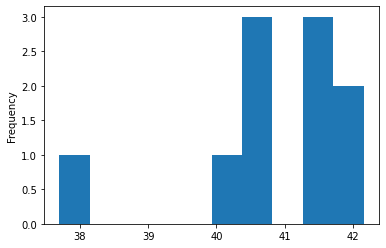

In [39]:
kv_iterasi[kv_iterasi.kombinasi_variabel == 'KV 1'].rmse_total.plot.hist()

In [51]:
from statsmodels.stats.diagnostic import lilliefors
from scipy import stats

kv = kv_iterasi.kombinasi_variabel.unique()


shapiro = []
for k in kv:
    rmse = kv_iterasi[kv_iterasi.kombinasi_variabel == k].rmse_total.to_list()
    result_shapiro = stats.shapiro(rmse)
    
    shapiro.append({
        'kombinasi_variabel' : k,
        'jumlah_data' : len(rmse),
        'statistic' : np.round(result_shapiro[0], 3),
        'pvalue' : np.round(result_shapiro[1], 3),
    })
  
rmse = kv_iterasi.rmse_total.to_list()
result_shapiro = stats.shapiro(rmse)
shapiro.append({
    'kombinasi_variabel' : 'Keseluruhan',
    'jumlah_data' : len(rmse),
    'statistic' : np.round(result_shapiro[0], 3),
    'pvalue' : np.round(result_shapiro[1], 3)
})

shapiro = pd.DataFrame(shapiro)
shapiro.to_csv('data/normality_test.csv', index=False)
shapiro

,kombinasi_variabel,jumlah_data,statistic,pvalue
0,KV 1,10,0.839,0.042
1,KV 2,10,0.928,0.428
2,KV 3,10,0.943,0.586
3,KV 4,10,0.987,0.991
4,KV 5,10,0.933,0.477
5,KV 6,10,0.959,0.772
6,KV 7,10,0.936,0.514
7,KV 8,10,0.952,0.697
8,Keseluruhan,80,0.961,0.016


In [52]:
all_kv = [kv_iterasi[kv_iterasi.kombinasi_variabel == k].rmse_total for k in kv]
kruskal(*all_kv)

KruskalResult(statistic=38.80037037037033, pvalue=2.1335310733580586e-06)

In [23]:
from itertools import combinations
pvalue = []
for i, j in combinations(kv, 2):
    x = kv_iterasi[kv_iterasi.kombinasi_variabel == i].rmse_total
    y = kv_iterasi[kv_iterasi.kombinasi_variabel == j].rmse_total
    
    pvalue.append({
        'x' : i,
        'y' : j,
        'pvalue' : np.round(mannwhitneyu(x, y)[1], 3)
    })
pvalue = pd.DataFrame(pvalue)
pvalue

,x,y,pvalue
0,KV 1,KV 2,0.307
1,KV 1,KV 3,0.385
2,KV 1,KV 4,0.089
3,KV 1,KV 5,0.011
4,KV 1,KV 6,0.002
5,KV 1,KV 7,0.002
6,KV 1,KV 8,0.026
7,KV 2,KV 3,1.000
8,KV 2,KV 4,0.031
9,KV 2,KV 5,0.212


In [25]:
kv5 = kv_iterasi[kv_iterasi.kombinasi_variabel == "KV 1"].rmse_total
kv1 = kv_iterasi[kv_iterasi.kombinasi_variabel == "KV 4"].rmse_total

print(mannwhitneyu(kv1, kv5))

MannwhitneyuResult(statistic=73.0, pvalue=0.08897301170181328)


## Tujuan 3
Membandingkan model terbaik dari setiap kombinasi variabel untuk menentukan kombinasi variabel mana yang paling baik untuk memprediksi harga saham BRI

In [15]:
root = 'kombinasi_variabel'
folds = 60

data_kv = []
for foldername in os.listdir(root):
    kv, iterasi = foldername.split('-')
    
    with open(os.path.join(root, foldername, 'summary_iter.json')) as f:
        summary_iter = json.load(f)
        
    summary_iter = summary_iter[-folds:]
    
    for fold, iter in enumerate(summary_iter, start=1):
        data_kv.append({
            'kombinasi_variabel' : kv,
            'iterasi' : iterasi,
            'fold' : fold,
            'rmse' : iter['rmse'],
            'mae' : iter['mae'],
            'best_epoch' : iter['best_epoch'],
            'stopped_epoch' : iter['stopped_epoch']
        })

data_kv = pd.DataFrame(data_kv)
data_iterasi = data_kv.groupby(['kombinasi_variabel', 'iterasi'])['rmse'].agg([np.mean, np.std]).reset_index()
rmse = data_iterasi.groupby('kombinasi_variabel')['mean'].agg([np.mean, np.std])
rmse

,mean,std
kombinasi_variabel,,
KV 1,137.814760,2.626844
KV 2,83.308324,3.824619
KV 3,91.019672,2.718066
KV 4,134.373921,7.297704
KV 5,87.245915,3.355323
KV 6,141.023482,6.188389
KV 7,160.382071,11.529137
KV 8,131.380680,7.441360


In [6]:
data_iterasi = data_kv.groupby(['kombinasi_variabel', 'iterasi'])['mae'].agg([np.mean, np.std]).reset_index()
data_iterasi.groupby('kombinasi_variabel')['mean'].agg([np.mean, np.std])

,mean,std
kombinasi_variabel,,
KV 1,130.295004,2.741698
KV 2,75.337603,3.693943
KV 3,82.987067,2.630650
KV 4,125.960452,7.357132
KV 5,78.204461,3.440627
KV 6,130.121243,7.003513
KV 7,153.342946,11.655075
KV 8,123.297737,7.571940


In [5]:
df = data_kv.groupby(['kombinasi_variabel', 'fold'])['rmse'].mean().to_frame().reset_index()
df['fold'] = 61 - df['fold']
df

,kombinasi_variabel,fold,rmse
0,KV 1,60,382.431865
1,KV 1,59,397.966581
2,KV 1,58,420.590472
3,KV 1,57,437.989287
4,KV 1,56,442.342936
...,...,...,...
475,KV 8,5,100.437384
476,KV 8,4,68.330651
477,KV 8,3,56.422724
478,KV 8,2,33.369438


In [8]:
df[(df.kombinasi_variabel == 'KV 2') & (df.rmse > 150)]

,kombinasi_variabel,fold,rmse
60,KV 2,60,167.095844
61,KV 2,59,172.298577
73,KV 2,47,169.508071
75,KV 2,45,201.424288
99,KV 2,21,186.878998


In [14]:
kv2 = df[df.kombinasi_variabel == 'KV 2']
kv2.iloc[kv2.rmse.argmax()]

kombinasi_variabel          KV 2
fold                          45
rmse                  201.424288
Name: 75, dtype: object

In [53]:
def get_color(kv):
    if kv == 'KV 1': return '#ff0000'
    if kv == 'KV 2': return '#ff8c00'
    if kv == 'KV 3': return '#00ff0d'
    if kv == 'KV 4': return '#02decc'
    if kv == 'KV 5': return '#02a37d'
    if kv == 'KV 6': return '#006bde'
    if kv == 'KV 7': return '#b500de'
    if kv == 'KV 8': return '#003f5c'
    
def visualisasi_fold(kv_pertama, kv_kedua):

    kv1 = df[df.kombinasi_variabel == kv_pertama]
    kv2 = df[df.kombinasi_variabel == kv_kedua]

    fig, ax = plt.subplots(figsize=(9, 6))

    ax.plot(kv1['fold'], kv1['rmse'], get_color(kv_pertama), label=kv_pertama)
    ax.plot(kv2['fold'], kv2['rmse'], get_color(kv_kedua), label=kv_kedua)

    for position, spine in ax.spines.items():
        if position in ['right', 'top']:
            spine.set_visible(False)


    ax.set_ylim([0, 470])
    ax.set_yticks(np.arange(50, 451, step=100))
    ax.set_yticklabels(np.arange(50, 451, step=100))

    ax.set_xticks(np.hstack([[1], np.arange(5, 61, step=5)]))
    ax.set_xticklabels(np.hstack([[1], np.arange(5, 61, step=5)]))

    ax.set_title(f'{kv_pertama} vs {kv_kedua}', size=14, pad=20)
    ax.grid(axis='y', linestyle = '--', linewidth = 0.5)
    ax.legend(loc='upper left');

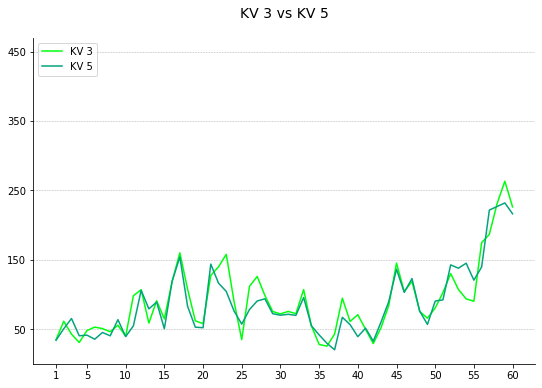

In [63]:
visualisasi_fold('KV 3', 'KV 5')

In [11]:
rmse = rmse.reset_index()

perubahan = []
for index1, kv_1 in rmse.iterrows():
    for index2, kv_2 in rmse.iterrows():
        p = (kv_2['mean'] - kv_1['mean']) / kv_1['mean'] * 100
        perubahan.append({
            'rmse1' : kv_1['kombinasi_variabel'],
            'rmse2' : kv_2['kombinasi_variabel'],
            'perubahan' : round(p, 2)
        })
        
perubahan = pd.DataFrame(perubahan)
perubahan.pivot('rmse2', 'rmse1', 'perubahan')

## Tujuan 4
Melakukan evaluasi pada model dengan kombinasi variabel terbaik untuk mendapatkan estimasi eror dari prediksi dan membandingkannya dengan model yang berasal dari penelitian lainnya

In [54]:
root = 'testing_data'

data_kv = []
data_metrics = []
for foldername in os.listdir(root):
    kv, days = foldername.split('-')
    
    for iterasi in os.listdir(os.path.join(root, foldername)):
        with open(os.path.join(root, foldername, iterasi, 'summary_iter.json')) as f:
            summary_iter = json.load(f)
            
        for fold, iter in enumerate(summary_iter, start=1):
            temp = {
                'kombinasi_variabel' : kv,
                'days' : days,
                'iterasi' : iterasi,
                'fold' : fold,
                'rmse' : iter['rmse'],
                'mae' : iter['mae'],
                'best_epoch' : iter['best_epoch'],
                'stopped_epoch' : iter['stopped_epoch'],
                'y_pred' : iter['prediction_test']['y_pred'],
                'y_test' : iter['prediction_test']['y_true'],
                'error' : np.array(iter['prediction_test']['y_pred']) - np.array(iter['prediction_test']['y_true'])
            }
            
            for index, error in enumerate(temp['error'], start=1):
                temp[f"error_abs_{index}"] = np.abs(error)
                
            data_kv.append(temp)
            
        with open(os.path.join(root, foldername, iterasi, 'metrics.json')) as f:
            metrics = json.load(f)
        
        data_metrics.append({
            'kombinasi_variabel' : kv,
            'days' : days,
            'iterasi' : iterasi,
            'rmse' : metrics['rmse_total'],
            'mae' : metrics['mae_total'],
            'rmse_eachday' : metrics['rmse_eachday'],
            'mae_eachday' : metrics['mae_eachday'],
        })


def mapper_nilai(row, column_to_extend):
    for i in range(1, 6):
        row[f"{column_to_extend}_{i}"] = row[column_to_extend][i-1]
    return row

In [ ]:
data_kv = pd.DataFrame(data_kv)
data_metrics = pd.DataFrame(data_metrics)

data_metrics = (data_metrics
                .apply(lambda x : mapper_nilai(x, 'mae_eachday'), axis=1)
                .apply(lambda x : mapper_nilai(x, 'rmse_eachday'), axis=1)
                .drop(['rmse_eachday', 'mae_eachday'], axis=1))

data_kv = (data_kv
           .apply(lambda x : mapper_nilai(x, 'y_pred'), axis=1)
           .apply(lambda x : mapper_nilai(x, 'y_test'), axis=1)
           .drop(['y_pred', 'y_test'], axis=1))

### RMSE

In [55]:
data_iterasi = data_kv.groupby(['kombinasi_variabel', 'days', 'iterasi'])['rmse'].agg([np.mean, np.std]).reset_index()
rmse2 = data_iterasi.groupby(['kombinasi_variabel', 'days'])['mean'].agg([np.mean, np.std])
rmse2 = rmse2.reset_index()
rmse2['days']  = rmse2.days.str.split('_').apply(lambda x : int(x[0]))
rmse2 = rmse2.sort_values(['kombinasi_variabel', 'days'])
rmse2['mean'] = np.round(rmse2['mean'], 2)
rmse2['std'] = np.round(rmse2['std'], 2)
rmse2

,kombinasi_variabel,days,mean,std
2,KV 2,1,96.61,2.75
4,KV 2,5,102.51,7.26
0,KV 2,10,105.48,9.21
1,KV 2,15,106.89,10.12
3,KV 2,20,126.30,10.03
7,heiden,1,4180.63,49.23
9,heiden,5,4215.80,121.25
5,heiden,10,4276.47,0.00
6,heiden,15,4236.28,127.10
8,heiden,20,4202.32,234.49


In [56]:
bri = pd.read_csv('data/testing_data.csv')
tanggal = bri.iloc[-61:-4].date

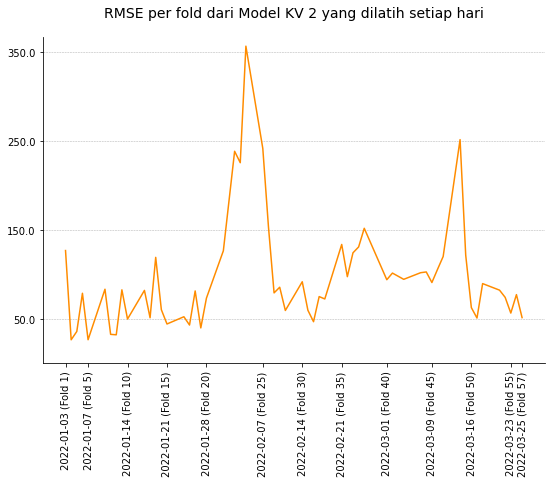

In [57]:
terbaik = data_kv[(data_kv.kombinasi_variabel == 'KV 2') & (data_kv.days == '1_days')]
terbaik = terbaik.groupby('fold')['rmse'].mean().to_frame().reset_index()
terbaik['tanggal'] = tanggal.to_list()
terbaik['tanggal'] = pd.to_datetime(terbaik['tanggal'])
terbaik['label'] = terbaik['tanggal'].astype(str) + " (Fold " + terbaik['fold'].astype(str) + ")"

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(terbaik['tanggal'], terbaik['rmse'], '#ff8c00')


for position, spine in ax.spines.items():
    if position in ['right', 'top']:
        spine.set_visible(False)


max_y = terbaik.rmse.max() + 10
ax.set_ylim([0, max_y])
ax.set_yticks(np.arange(50, max_y, step=100))
ax.set_yticklabels(np.arange(50, max_y, step=100))


idx = np.hstack([[1], np.arange(5, 57, step=5), [57]]) - 1

# ax.set_xticks(np.hstack([[1], np.arange(5, 57, step=5), [57]]))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
# ax.set_xticklabels(terbaik['tanggal'])

ax.set_xticks(terbaik.tanggal.iloc[idx])
ax.set_xticklabels(terbaik.label.iloc[idx], rotation = 90)

ax.set_title(f'RMSE per fold dari Model KV 2 yang dilatih setiap hari', size=14, pad=20)
ax.grid(axis='y', linestyle = '--', linewidth = 0.5)

In [77]:
terbaik['close'] = bri[bri.date.isin(terbaik.tanggal.astype(str))].close.to_list()

### MAE

In [7]:
data_iterasi = data_kv.groupby(['kombinasi_variabel', 'days', 'iterasi'])['mae'].agg([np.mean, np.std]).reset_index()
mae = data_iterasi.groupby(['kombinasi_variabel', 'days'])['mean'].agg([np.mean, np.std])
mae = mae.reset_index()
mae['days']  = mae.days.str.split('_').apply(lambda x : int(x[0]))
mae = mae.sort_values(['kombinasi_variabel', 'days'])
mae['mean'] = np.round(mae['mean'], 2)
mae['std'] = np.round(mae['std'], 2)
mae

,kombinasi_variabel,days,mean,std
2,KV 2,1,86.98,2.51
4,KV 2,5,93.01,7.35
0,KV 2,10,96.38,9.27
1,KV 2,15,96.99,10.34
3,KV 2,20,117.73,10.42
7,heiden,1,4172.97,50.24
9,heiden,5,4200.08,133.81
5,heiden,10,4276.11,0.00
6,heiden,15,4211.66,203.79
8,heiden,20,4170.84,332.88


In [8]:
mae2 = data_kv[(data_kv.kombinasi_variabel == 'KV 2') & (data_kv.days == '1_days')]
mae2 = mae2.groupby('fold')['mae'].mean().to_frame().reset_index()
mae2.describe()

,fold,mae
count,57.000000,57.000000
mean,29.000000,86.979775
std,16.598193,59.216570
min,1.000000,20.977422
25%,15.000000,50.227881
50%,29.000000,76.871357
75%,43.000000,92.934375
max,57.000000,343.302930


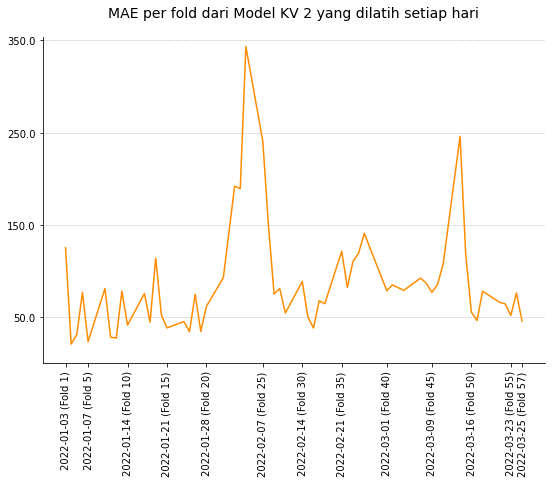

In [9]:
mae3 = data_kv[(data_kv.kombinasi_variabel == 'KV 2') & (data_kv.days == '1_days')]
mae3 = mae3.groupby('fold')['mae'].mean().to_frame().reset_index()
mae3['tanggal'] = tanggal.to_list()
mae3['tanggal'] = pd.to_datetime(mae3['tanggal'])
mae3['label'] = mae3['tanggal'].astype(str) + " (Fold " + mae3['fold'].astype(str) + ")"

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(mae3['tanggal'], mae3['mae'], '#ff8c00')


for position, spine in ax.spines.items():
    if position in ['right', 'top']:
        spine.set_visible(False)


max_y = mae3.mae.max() + 10
ax.set_ylim([0, max_y])
ax.set_yticks(np.arange(50, max_y, step=100))
ax.set_yticklabels(np.arange(50, max_y, step=100))


idx = np.hstack([[1], np.arange(5, 57, step=5), [57]]) - 1

# ax.set_xticks(np.hstack([[1], np.arange(5, 57, step=5), [57]]))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
# ax.set_xticklabels(mae3['tanggal'])

ax.set_xticks(mae3.tanggal.iloc[idx])
ax.set_xticklabels(mae3.label.iloc[idx], rotation = 90)

ax.set_title(f'MAE per fold dari Model KV 2 yang dilatih setiap hari', size=14, pad=20)
ax.grid(axis='y', linestyle = '--', linewidth = 0.5)

### Per days

In [ ]:
kv2_metrics = data_metrics[(data_metrics.kombinasi_variabel == 'KV 2') & (data_metrics.days == '1_days')].reset_index(drop=True)
kv2_metrics.describe()

In [59]:
metrics1 = data_kv[(data_kv.kombinasi_variabel == 'KV 2') & (data_kv.days == '1_days')]
metrics1 = metrics1.groupby('fold')[['error_abs_1', 'error_abs_2', 'error_abs_3', 'error_abs_4', 'error_abs_5']].mean()
metrics1.describe()

,error_abs_1,error_abs_2,error_abs_3,error_abs_4,error_abs_5
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,70.163921,78.254376,88.184617,95.477155,102.818805
std,44.357134,63.201366,71.142002,82.527184,85.630333
min,11.062988,10.273193,9.351562,18.465869,9.482422
25%,38.239600,43.823096,43.761133,48.123047,44.598242
50%,55.743506,58.468213,66.573730,72.328271,75.504541
75%,92.685400,89.071680,105.457080,94.932959,131.606250
max,202.834326,351.069946,390.932593,402.937793,413.320215


In [60]:
df = metrics1.unstack().to_frame().reset_index().rename(columns={0 : 'mae', 'level_0' : 'prediksi'})

,prediksi,fold,mae
0,error_abs_1,1,136.289282
1,error_abs_1,2,11.062988
2,error_abs_1,3,31.257568
3,error_abs_1,4,81.033496
4,error_abs_1,5,32.695361
...,...,...,...
280,error_abs_5,53,35.457324
281,error_abs_5,54,108.750537
282,error_abs_5,55,42.480225
283,error_abs_5,56,75.661865


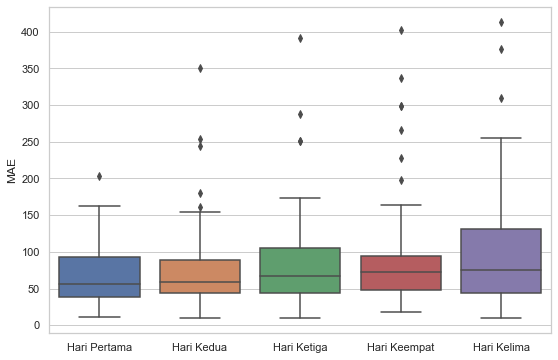

In [61]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))
x = sns.boxplot(x="prediksi", y="mae", data=df)
x.set_xticklabels(['Hari Pertama', 'Hari Kedua', 'Hari Ketiga', 'Hari Keempat', 'Hari Kelima'])
x.set_xlabel('')
x.set_ylabel('MAE');

### Visualisasi Hasil Prediksi

In [62]:
selected_columns = data_kv.columns[data_kv.columns.str.contains('y_test') | data_kv.columns.str.contains('y_pred')]
data_predicted = data_kv.groupby(['kombinasi_variabel', 'days', 'fold'])[selected_columns].mean().reset_index()

In [63]:
def make_visualization_prediction(data_predicted, kv, days, pred_hari_ke, color, title, legend_position='upper left'):
    selected_data = data_predicted[(data_predicted.kombinasi_variabel == kv) & (data_predicted.days == days)].reset_index(drop=True)
    
    data_testing = pd.read_csv('data/testing_data.csv')[-61:].reset_index(drop=True)[['date', 'close']]
    data_testing['y_pred_1'] = selected_data['y_pred_1'].to_list() + [None, None, None, None]
    data_testing['y_pred_2'] = [None] + selected_data['y_pred_2'].to_list() + [None, None, None]
    data_testing['y_pred_3'] = [None, None] + selected_data['y_pred_2'].to_list() + [None, None]
    data_testing['y_pred_4'] = [None, None, None] + selected_data['y_pred_2'].to_list() + [None]
    data_testing['y_pred_5'] = [None, None, None, None] + selected_data['y_pred_2'].to_list()
    data_testing['date'] = pd.to_datetime(data_testing['date'])
    
    fig, ax = plt.subplots(figsize=(9, 6))

    ax.plot(data_testing['date'], data_testing['close'], '#006bde', label='Nilai Sebenarnya')
    ax.plot(data_testing['date'], data_testing[pred_hari_ke], color, label='Nilai Prediksi')

    for position, spine in ax.spines.items():
        if position in ['right', 'top']:
            spine.set_visible(False)

    ax.set_title(title, size=20, pad=0)
    ax.grid(axis='y', linestyle = '--', linewidth = 0.5)
    ax.legend(loc=legend_position, fontsize=17);

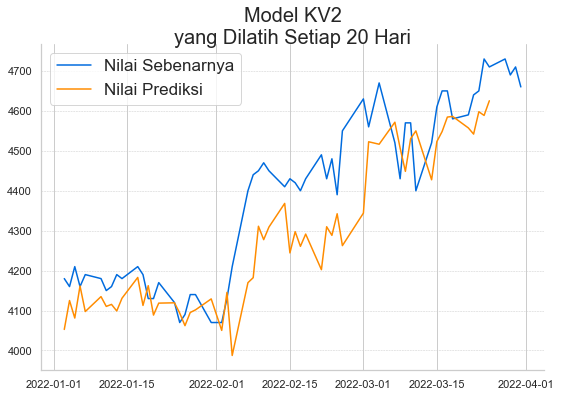

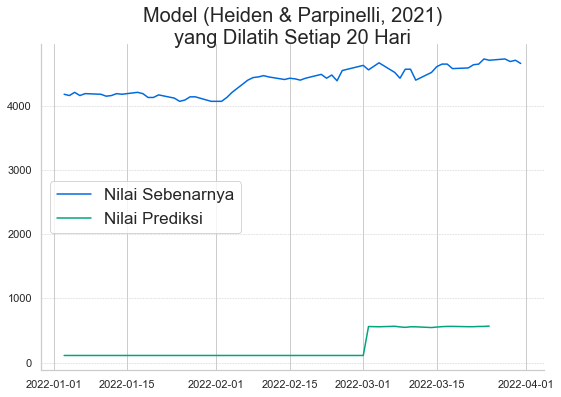

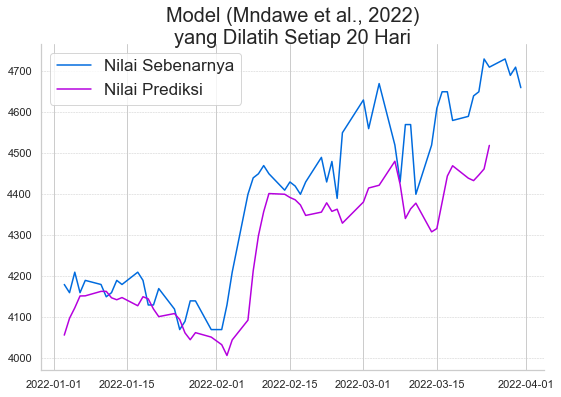

In [66]:
# Dilatih setiap hari
# make_visualization_prediction(data_predicted, kv='KV 2', days='1_days', 
#                               pred_hari_ke='y_pred_1', color='#ff8c00', 
#                               title='Model KV2\nyang Dilatih Setiap Hari')

# make_visualization_prediction(data_predicted, kv='heiden', days='1_days', 
#                               pred_hari_ke='y_pred_1', color='#02a37d', 
#                               title='Model (Heiden & Parpinelli, 2021)\nyang Dilatih Setiap Hari',
#                               legend_position='center left')

# make_visualization_prediction(data_predicted, kv='mndawe', days='1_days', 
#                               pred_hari_ke='y_pred_1', color='#b500de', 
#                               title='Model (Mndawe et al., 2022)\nyang Dilatih Setiap Hari')

# Dilatih 5 hari sekali
# make_visualization_prediction(data_predicted, kv='KV 2', days='5_days', 
#                               pred_hari_ke='y_pred_1', color='#ff8c00', 
#                               title='Model KV2\nyang Dilatih Setiap 5 Hari')

# make_visualization_prediction(data_predicted, kv='heiden', days='5_days', 
#                               pred_hari_ke='y_pred_1', color='#02a37d', 
#                               title='Model (Heiden & Parpinelli, 2021)\nyang Dilatih Setiap 5 Hari',
#                               legend_position='center left')

# make_visualization_prediction(data_predicted, kv='mndawe', days='1_days', 
#                               pred_hari_ke='y_pred_1', color='#b500de', 
#                               title='Model (Mndawe et al., 2022)\nyang Dilatih Setiap 5 Hari')

# Dilatih 10 hari sekali
# make_visualization_prediction(data_predicted, kv='KV 2', days='10_days', 
#                               pred_hari_ke='y_pred_1', color='#ff8c00', 
#                               title='Model KV2\nyang Dilatih Setiap 10 Hari')

# make_visualization_prediction(data_predicted, kv='heiden', days='10_days', 
#                               pred_hari_ke='y_pred_1', color='#02a37d', 
#                               title='Model (Heiden & Parpinelli, 2021)\nyang Dilatih Setiap 10 Hari',
#                               legend_position='center left')

# make_visualization_prediction(data_predicted, kv='mndawe', days='10_days', 
#                               pred_hari_ke='y_pred_1', color='#b500de', 
#                               title='Model (Mndawe et al., 2022)\nyang Dilatih Setiap 10 Hari')

# Dilatih 15 hari sekali
# make_visualization_prediction(data_predicted, kv='KV 2', days='15_days', 
#                               pred_hari_ke='y_pred_1', color='#ff8c00', 
#                               title='Model KV2\nyang Dilatih Setiap 15 Hari')

# make_visualization_prediction(data_predicted, kv='heiden', days='15_days', 
#                               pred_hari_ke='y_pred_1', color='#02a37d', 
#                               title='Model (Heiden & Parpinelli, 2021)\nyang Dilatih Setiap 15 Hari',
#                               legend_position='center left')

# make_visualization_prediction(data_predicted, kv='mndawe', days='15_days', 
#                               pred_hari_ke='y_pred_1', color='#b500de', 
#                               title='Model (Mndawe et al., 2022)\nyang Dilatih Setiap 15 Hari')

# Dilatih 20 hari sekali
make_visualization_prediction(data_predicted, kv='KV 2', days='20_days', 
                              pred_hari_ke='y_pred_1', color='#ff8c00', 
                              title='Model KV2\nyang Dilatih Setiap 20 Hari')

make_visualization_prediction(data_predicted, kv='heiden', days='20_days', 
                              pred_hari_ke='y_pred_1', color='#02a37d', 
                              title='Model (Heiden & Parpinelli, 2021)\nyang Dilatih Setiap 20 Hari',
                              legend_position='center left')

make_visualization_prediction(data_predicted, kv='mndawe', days='20_days', 
                              pred_hari_ke='y_pred_1', color='#b500de', 
                              title='Model (Mndawe et al., 2022)\nyang Dilatih Setiap 20 Hari')

### Visualisasi Hari ke 1-5 dari model KV2

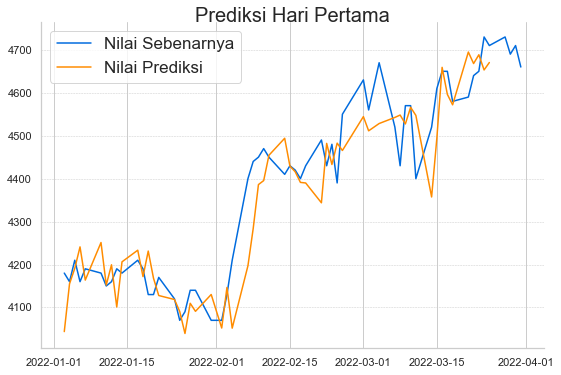

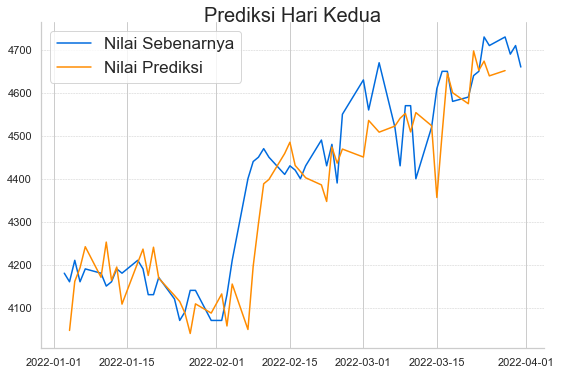

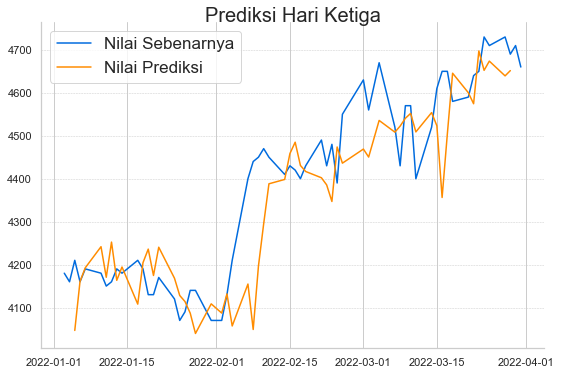

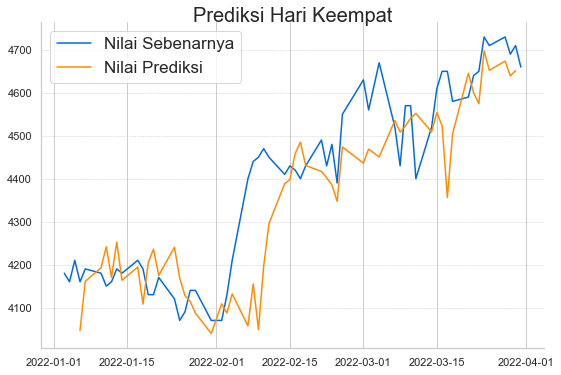

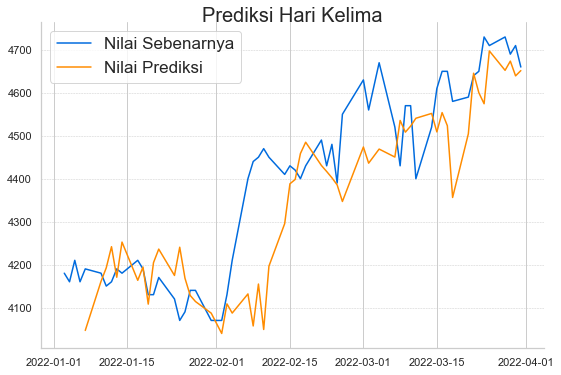

In [71]:
vis = [
    ('Pertama', 'y_pred_1'),
    ('Kedua', 'y_pred_2'),
    ('Ketiga', 'y_pred_3'),
    ('Keempat', 'y_pred_4'),
    ('Kelima', 'y_pred_5'),
]

for v in vis:
    make_visualization_prediction(data_predicted, kv='KV 2', days='1_days', 
                              pred_hari_ke=v[1], color='#ff8c00', 
                              title=f'Prediksi Hari {v[0]}')

In [18]:
data_testing = pd.read_csv('data/testing_data.csv')[-61:].reset_index(drop=True)[['date', 'close']]

kv2_1days = data_predicted[(data_predicted.kombinasi_variabel == 'KV 2') & (data_predicted.days == '1_days')].reset_index(drop=True)

data_testing.to_csv('b1.csv', index=False)
kv2_1days.to_csv('b2.csv', index=False)
kv2_1days

,kombinasi_variabel,days,fold,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_test_1,y_test_2,y_test_3,y_test_4,y_test_5
0,KV 2,1_days,1,4043.710718,4046.701025,4057.313550,4059.097925,4065.874170,4180.0,4160.0,4210.0,4160.0,4190.0
1,KV 2,1_days,2,4155.026465,4160.895312,4160.674219,4164.114551,4171.558496,4160.0,4210.0,4160.0,4190.0,4180.0
2,KV 2,1_days,3,4191.108252,4192.536670,4191.943750,4192.903857,4192.191113,4210.0,4160.0,4190.0,4180.0,4150.0
3,KV 2,1_days,4,4241.033496,4241.674561,4245.461816,4247.508545,4248.678369,4160.0,4190.0,4180.0,4150.0,4160.0
4,KV 2,1_days,5,4163.731201,4170.509180,4174.430225,4176.405908,4173.819287,4190.0,4180.0,4150.0,4160.0,4190.0
5,KV 2,1_days,6,4251.199414,4252.407373,4256.380322,4250.120264,4255.504541,4180.0,4150.0,4160.0,4190.0,4180.0
6,KV 2,1_days,7,4152.131348,4163.397510,4158.318164,4163.733105,4160.047998,4150.0,4160.0,4190.0,4180.0,4210.0
7,KV 2,1_days,8,4199.332666,4194.361768,4192.090039,4191.111865,4185.475830,4160.0,4190.0,4180.0,4210.0,4190.0
8,KV 2,1_days,9,4101.044531,4107.985034,4104.542920,4096.514844,4100.641260,4190.0,4180.0,4210.0,4190.0,4130.0
9,KV 2,1_days,10,4206.223486,4204.454932,4204.231250,4202.328271,4202.803857,4180.0,4210.0,4190.0,4130.0,4130.0
